# Example: Languages 

This example demonstrates a classic many-to-many relationship design using an association table. We'll track people and the languages they speak, along with their proficiency levels using the internationally recognized CEFR standard.

## Database Schema

The database consists of four tables:
1. **Language** - A lookup table containing ISO 639-1 language codes and names
2. **CEFRLevel** - A lookup table defining the six CEFR proficiency levels (A1-C2)
3. **Person** - Individual people with basic information
4. **Proficiency** - An association table linking people, languages, and proficiency levels

This design demonstrates:
- **Many-to-many relationship**: Each person can speak multiple languages, and each language is spoken by multiple people
- **Lookup tables**: Both Language and CEFRLevel are lookup tables with predefined, standardized content
- **Association table with multiple foreign keys**: Proficiency references Person, Language, and CEFRLevel
- **Normalization**: CEFR levels are stored in their own table with additional metadata (descriptions, categories)
- **International standards**: Uses ISO 639-1 codes for languages and CEFR levels for proficiency

## Language Codes: ISO 639-1 Standard

We use **ISO 639-1** language codes, which are the international standard for representing languages. These codes provide:

### Background
- **ISO 639-1** is part of the ISO 639 series of standards for language codes
- Established by the International Organization for Standardization (ISO)
- Provides two-letter codes for major world languages
- Used globally in software, databases, and international systems

### Benefits of ISO 639-1 Codes
1. **International Standard**: Recognized worldwide across industries
2. **Consistent**: Two-letter format ensures uniform representation
3. **Comprehensive**: Covers major languages with official status
4. **Future-proof**: Maintained and updated by ISO
5. **Integration**: Compatible with web standards (HTML lang attributes, etc.)

### Examples of ISO 639-1 Codes
- `en` - English
- `es` - Spanish  
- `fr` - French
- `de` - German
- `ja` - Japanese
- `zh` - Chinese
- `ar` - Arabic
- `hi` - Hindi

### Database Design Considerations
Using standardized codes in our database ensures:
- **Data consistency** across different systems
- **Easy integration** with external APIs and services
- **Future compatibility** with international standards
- **Reduced ambiguity** compared to custom codes

## Table Definition

In [34]:
%xmode minimal
import datajoint as dj
dj.config['display.limit'] = 6  # keep output concise

# Create schema
schema = dj.Schema('languages_example')

@schema
class Language(dj.Lookup):
    definition = """
    lang_code : char(2)  # ISO 639-1 language code (e.g., 'en', 'es', 'ja')
    ---
    language : varchar(30)  # Full language name
    native_name : varchar(50)  # Language name in its native script
    """
    contents = [
        # Format: (code, language, native_name, family)
        ('ar', 'Arabic', 'العربية'), ('da', 'Danish', 'Dansk'),
        ('de', 'German', 'Deutsch'), ('el', 'Greek', 'Ελληνικά'),
        ('en', 'English', 'English'), ('es', 'Spanish', 'Español'),
        ('fi', 'Finnish', 'Suomi'), ('fr', 'French', 'Français'),
        ('he', 'Hebrew', 'עברית'), ('hi', 'Hindi', 'हिन्दी'),
        ('id', 'Indonesian', 'Bahasa Indonesia'),
        ('it', 'Italian', 'Italiano'), ('ja', 'Japanese', '日本語'),
        ('ko', 'Korean', '한국어'), ('ms', 'Malay', 'Bahasa Melayu'),
        ('nl', 'Dutch', 'Nederlands'), ('no', 'Norwegian', 'Norsk'),
        ('ph', 'Filipino', 'Tagalog'), ('pl', 'Polish', 'Polski'),
        ('pt', 'Portuguese', 'Português'), ('ru', 'Russian', 'Русский'),
        ('sa', 'Sanskrit', 'संस्कृतम्'), ('sv', 'Swedish', 'Svenska'),
        ('th', 'Thai', 'ไทย'), ('tr', 'Turkish', 'Türkçe'),
        ('uk', 'Ukrainian', 'Українська'),
        ('vi', 'Vietnamese', 'Tiếng Việt'), ('zh', 'Chinese', '中文')]

@schema
class CEFRLevel(dj.Lookup):
    definition = """
    cefr_level : char(2)  # CEFR proficiency level code (A1, A2, B1, B2, C1, C2)
    ---
    level_name : varchar(30)  # Full name of the level
    category : enum('Basic', 'Independent', 'Proficient')  # User category
    description : varchar(255)  # Brief description of abilities at this level
    """
    contents = [
        ('A1', 'Beginner', 'Basic', 
         'Can understand and use familiar everyday expressions and very basic phrases'),
        ('A2', 'Elementary', 'Basic',
         'Can communicate in simple routine tasks requiring direct exchange of information'),
        ('B1', 'Intermediate', 'Independent',
         'Can deal with most situations while traveling and produce simple connected text'),
        ('B2', 'Upper Intermediate', 'Independent',
         'Can interact with fluency and spontaneity and produce clear, detailed text'),
        ('C1', 'Advanced', 'Proficient',
         'Can express ideas fluently and use language flexibly for social and professional purposes'),
        ('C2', 'Mastery', 'Proficient',
         'Can understand virtually everything and express themselves with precision')
    ]

Exception reporting mode: Minimal


## Benefits of Using ISO 639-1 Codes

### 1. **International Compatibility**
```python
# These codes work with web standards and international APIs
web_lang_attr = f'<html lang="{lang_code}">'  # e.g., <html lang="en">
api_request = f'https://api.translate.com?lang={lang_code}'  # e.g., lang=en
```

### 2. **Consistent Data Representation**
```python
# All systems recognize these codes
browser_detection = {'en': 'English', 'es': 'Spanish', 'ja': 'Japanese'}
database_lookup = Language & {'lang_code': 'en'}  # Always works
```

### 3. **Future-Proof Design**
```python
# New languages can be added following the same standard
# ISO maintains and updates the standard regularly
new_languages = [
    ('sw', 'Swahili', 'Kiswahili'),
    ('th', 'Thai', 'ไทย'),
    ('vi', 'Vietnamese', 'Tiếng Việt')
]
```

### 4. **Integration with External Services**
```python
# Compatible with translation services, content management systems
translation_api = f'https://translate.googleapis.com/translate_a/single?client=gtx&sl=en&tl={lang_code}'
content_management = f'<meta name="language" content="{lang_code}">'
```

## Language Proficiency: CEFR Levels

For measuring language proficiency, we use the **CEFR** (Common European Framework of Reference for Languages), which is the international standard for describing language ability.

### Background

The **Common European Framework of Reference for Languages (CEFR)** was developed by the Council of Europe and published in 2001. It provides:

- **Standardized proficiency descriptors** recognized worldwide
- **Six proficiency levels** from beginner to mastery
- **Can-do statements** describing practical abilities at each level
- **Common reference** for language teaching, testing, and certification

### The Six CEFR Levels

The CEFR defines six levels, grouped into three broad categories:

#### **A - Basic User**
- **A1 (Beginner)**: Can understand and use familiar everyday expressions and very basic phrases. Can introduce themselves and ask and answer simple personal questions.
- **A2 (Elementary)**: Can understand sentences and frequently used expressions. Can communicate in simple routine tasks requiring direct exchange of information.

#### **B - Independent User**
- **B1 (Intermediate)**: Can understand main points on familiar matters. Can deal with most situations while traveling. Can produce simple connected text on familiar topics.
- **B2 (Upper Intermediate)**: Can understand main ideas of complex text. Can interact with native speakers with fluency and spontaneity. Can produce clear, detailed text on various subjects.

#### **C - Proficient User**
- **C1 (Advanced)**: Can understand a wide range of demanding texts. Can express ideas fluently and spontaneously. Can use language flexibly for social, academic, and professional purposes.
- **C2 (Mastery)**: Can understand virtually everything heard or read. Can summarize information from different sources. Can express themselves with precision and subtle distinction of meaning.

### Benefits of Using CEFR in Our Database

1. **International Recognition**: CEFR is used by universities, employers, and governments worldwide
2. **Precise Measurement**: Six levels provide nuanced proficiency assessment
3. **Practical Focus**: Levels describe what learners can actually do with the language
4. **Career Relevance**: Many job postings and educational programs reference CEFR levels
5. **Standardized Testing**: Major language tests (TOEFL, IELTS, DELE, etc.) map to CEFR levels

### CEFR Level Equivalencies

Common language tests map to CEFR as follows:
- **TOEFL iBT**: 42-71 (B1), 72-94 (B2), 95-120 (C1-C2)
- **IELTS**: 4.0-5.0 (B1), 5.5-6.5 (B2), 7.0-9.0 (C1-C2)
- **Cambridge**: PET (B1), FCE (B2), CAE (C1), CPE (C2)


# Using Language and Proficiency Tables 

Let's use the Language table to create a set of persons with different languages they speak.

In [35]:
@schema
class Person(dj.Manual):
    definition = """
    person_id : int  # Unique identifier for each person
    ---
    name : varchar(60)  # Person's name
    date_of_birth : date  # Date of birth
    """

@schema
class Proficiency(dj.Manual):
    definition = """
    -> Person
    -> Language
    ---
    -> CEFRLevel
    """

# CompleteSchema Diagram

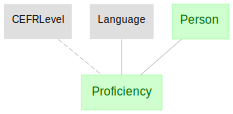

In [36]:
dj.Diagram(schema)

## Populating the Person and Proficiency data

Let's use Faker to generate realistic sample data for our Person table:


In [37]:
# Generate sample people data using Faker
import numpy as np
from faker import Faker

fake = Faker()

# Set seed for reproducible results
np.random.seed(42)
fake.seed_instance(42)

# Generate n people with diverse backgrounds
n = 500  # number of people to generate
Person.insert(
    {
        'person_id': i,
        'name': fake.name(),
        'date_of_birth': fake.date_of_birth(minimum_age=18, maximum_age=80)
    } for i in range(n))

Person()

person_id Unique identifier for each person,name Person's name,date_of_birth Date of birth
0,Allison Hill,1958-11-03
1,Megan Mcclain,1950-04-03
2,Allen Robinson,1976-08-12
3,Cristian Santos,1979-02-09
4,Kevin Pacheco,1945-03-09
5,Melissa Peterson,1954-07-28


Now let's create random language fluency data by assigning people various language skills:

In [38]:
lang_keys = Language.fetch("KEY")
cefr_keys = CEFRLevel.fetch("KEY")
# Weight probabilities: more people at intermediate levels than extremes
cefr_probabilities = [0.08, 0.12, 0.13, 0.17, 0.20, 0.30]
average_languages = 2.5

for person_key in Person.fetch("KEY"):
    num_languages = np.random.poisson(average_languages)
    Proficiency.insert(
        {
            **person_key,
            **lang_key,
            **np.random.choice(cefr_keys, p=cefr_probabilities)
        } for lang_key in np.random.choice(lang_keys, num_languages, replace=False)
    )

Proficiency()

person_id Unique identifier for each person,"lang_code ISO 639-1 language code (e.g., 'en', 'es', 'ja')","cefr_level CEFR proficiency level code (A1, A2, B1, B2, C1, C2)"
0,ko,C1
0,sa,C2
0,tr,B2
0,vi,A2
1,en,C2
1,hi,C2


### Why CEFR Levels Improve Queries

Using CEFR levels in our database enables more meaningful queries:

**Granular Filtering**: Query for specific proficiency ranges
```python
# Find people with working proficiency (B1-B2)
Proficiency & 'cefr_level in ("B1", "B2")'

# Find advanced speakers (C1-C2)
Proficiency & 'cefr_level in ("C1", "C2")'
```

**Comparable Across Languages**: CEFR provides consistent measurement
```python
# Find people who are intermediate (B1) or better in ANY language
Person & (Proficiency & 'cefr_level >= "B1"')
```

**Career-Relevant**: Matches real-world job requirements
```python
# Many job postings require "B2 or higher"
# Easy to query candidates meeting this criteria
```


## Sample Queries with Populated Data

Now that we have data in all three tables, let's run some example queries:


In [39]:
# Query 1: Find the names of all proficient English speakers (C1 or C2)
Person.proj('name') & (Proficiency & {'lang_code': 'en'} & 'cefr_level in ("C1", "C2")')

person_id Unique identifier for each person,name Person's name
1,Megan Mcclain
7,Lindsey Roman
61,James Powers
70,Taylor Mathis Jr.
78,Brittany Spears
97,April Mitchell


In [40]:
# Query 2: Names of people who speak English or Spanish at any level 
Person.proj('name') & (Proficiency & 'lang_code in ("en", "es")')

person_id Unique identifier for each person,name Person's name
1,Megan Mcclain
2,Allen Robinson
7,Lindsey Roman
10,Amber Perez
11,David Garcia
14,Nicholas Martin


In [41]:
# Query 3: Names of people who speak English AND Spanish at any level 
Person.proj('name') & (Proficiency & {'lang_code': 'en'}) & (Proficiency & {'lang_code': 'es'}) 

person_id Unique identifier for each person,name Person's name
200,Jordan Morris
262,Bobby Franklin
300,Sabrina Briggs
334,Joseph Burch
416,William Becker
484,Christopher Medina


In [42]:
# Query 4: Show the peole who speak at least four languages
Person.aggr(Proficiency, 'name',
            nlanguages='count(lang_code)', languages='GROUP_CONCAT(lang_code)'
            ) & 'nlanguages >= 4'

person_id Unique identifier for each person,name Person's name,nlanguages calculated attribute,languages calculated attribute
0,Allison Hill,4,"ko,sa,tr,vi"
1,Megan Mcclain,4,"en,hi,nl,no"
8,Valerie Gray,5,"fi,hi,ja,ko,ru"
9,Lisa Hensley,5,"he,hi,ph,ru,tr"
17,Daniel Hahn,4,"el,pt,sv,th"
18,Matthew Foster,4,"da,el,id,nl"


In [43]:
# Query 5: Show the top 3 people by number of languages spoken
Person.aggr(Proficiency, 'name',
            nlanguages='count(lang_code)'
            ) & dj.Top(3, order_by='nlanguages desc')

person_id Unique identifier for each person,name Person's name,nlanguages calculated attribute
200,Jordan Morris,7
251,Andrea Hubbard,7
333,Victoria Murray,7


In [45]:
# Query 6: Show all the people Lindsay Roman (person_id=7) can communicate wtih

Person & (
    Proficiency * Proficiency.proj(other_person='person_id') & {'other_person': 7}
    )


person_id Unique identifier for each person,name Person's name,date_of_birth Date of birth
0,Allison Hill,1958-11-03
1,Megan Mcclain,1950-04-03
2,Allen Robinson,1976-08-12
7,Lindsey Roman,1990-10-01
9,Lisa Hensley,1981-02-23
10,Amber Perez,1963-01-03


In [46]:
# Query 7: Find people with at least intermediate proficiency (B1+) in Spanish
Person.proj('name') & (Proficiency & {'lang_code': 'es'} & 'cefr_level >= "B1"')


person_id Unique identifier for each person,name Person's name
14,Nicholas Martin
15,Margaret Hawkins DDS
33,Angelica Tucker
39,Crystal Robinson
41,David Caldwell
47,Javier Ramirez


In [47]:
# Query 8: Show all languages and the number of people who speak them
Language.aggr(Proficiency, 'language', nspeakers='count(person_id)')

"lang_code ISO 639-1 language code (e.g., 'en', 'es', 'ja')",language Full language name,nspeakers calculated attribute
ar,Arabic,43
da,Danish,41
de,German,41
el,Greek,37
en,English,48
es,Spanish,50


In [48]:
# Query 9: Count people at each CEFR level for English
(CEFRLevel).aggr(Proficiency & {'lang_code': 'en'}, nspeakers='count(person_id)')


"cefr_level CEFR proficiency level code (A1, A2, B1, B2, C1, C2)",nspeakers calculated attribute
A1,6
A2,4
B1,4
B2,10
C1,7
C2,17


In [50]:
# Query 10: Show the top 3 languages by number of speakers
Language.aggr(Proficiency, 'language', nspeakers='count(person_id)') & dj.Top(3, order_by='nspeakers desc')

"lang_code ISO 639-1 language code (e.g., 'en', 'es', 'ja')",language Full language name,nspeakers calculated attribute
fr,French,57
no,Norwegian,55
th,Thai,53


In [54]:
# Query 12: Show language skills with full CEFR level descriptions for person 0
# This demonstrates the benefit of having CEFRLevel as a lookup table
(Person * Proficiency * Language * CEFRLevel).proj(
    'name', 'language', 'level_name', 'category', 'description'
) & {'person_id': 0}


person_id Unique identifier for each person,"lang_code ISO 639-1 language code (e.g., 'en', 'es', 'ja')","cefr_level CEFR proficiency level code (A1, A2, B1, B2, C1, C2)",name Person's name,language Full language name,level_name Full name of the level,category User category,description Brief description of abilities at this level
0,ko,C1,Allison Hill,Korean,Advanced,Proficient,Can express ideas fluently and use language flexibly for social and professional purposes
0,sa,C2,Allison Hill,Sanskrit,Mastery,Proficient,Can understand virtually everything and express themselves with precision
0,tr,B2,Allison Hill,Turkish,Upper Intermediate,Independent,"Can interact with fluency and spontaneity and produce clear, detailed text"
0,vi,A2,Allison Hill,Vietnamese,Elementary,Basic,Can communicate in simple routine tasks requiring direct exchange of information


In [55]:
# Query 11: Find polyglots with C1 and C2 (mastery) level in multiple languages
Person.aggr(
    Proficiency & 'cefr_level>="C1"',
    'name',
    num_mastered='count(*)'
) & 'num_mastered >= 2'


person_id Unique identifier for each person,name Person's name,num_mastered calculated attribute
0,Allison Hill,2
1,Megan Mcclain,4
7,Lindsey Roman,2
8,Valerie Gray,2
9,Lisa Hensley,3
14,Nicholas Martin,2


In [56]:
# If you need to re-run this example, you can drop the schema by uncommenting the following line:

# schema.drop()  